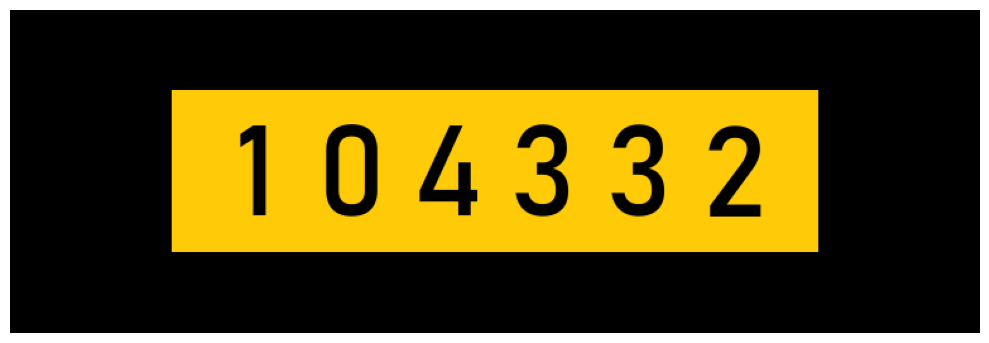

In [134]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import random

seed = 42
random.seed(seed)
np.random.seed(seed)


# Plate and background settings
plate_width = 512
plate_height = 128
font_size = 100
num_chars = 6
fill_density = 0.9  # Fraction of plate width occupied by digits

plate_number = "".join(str(random.randint(0, 9)) for _ in range(num_chars))

base_plate = Image.new("RGB", (plate_width, plate_height), (255, 203, 9))
drawer = ImageDraw.Draw(base_plate)
try:
    font = ImageFont.truetype("bahnschrift.ttf", font_size)
except IOError:
    font = ImageFont.load_default()

usable_width = plate_width * fill_density
cell_width = int(usable_width / num_chars)
margin_x = int((plate_width - cell_width * num_chars) / 2)
margin_y = 10
center_y = plate_height / 2

for i, char in enumerate(plate_number):
    left, top, right, bottom = drawer.textbbox((0, 0), char, font=font)
    char_w, char_h = right - left, bottom - top

    cell_left = margin_x + i * cell_width
    center_x = cell_left + cell_width / 2

    x = center_x - char_w / 2 - left
    y = center_y - char_h / 2 - top
    drawer.text((x, y), char, fill=(0, 0, 0), font=font)

digit_bboxes = [
    (margin_x + i * cell_width, margin_y, cell_width, plate_height - 2 * margin_y) for i in range(num_chars)
]

padded_w = int(plate_width * 1.5)
padded_h = int(plate_height * 2)
padded_img = Image.new("RGB", (padded_w, padded_h), (0, 0, 0))
pad_x = (padded_w - plate_width) // 2
pad_y = (padded_h - plate_height) // 2
padded_img.paste(base_plate, (pad_x, pad_y))

# Plot for the report
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(padded_img)
ax.axis("off")
plt.tight_layout()
plt.show()


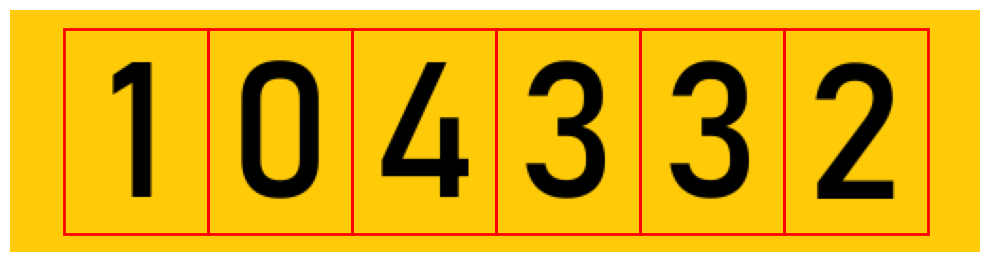

In [2]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

seed = 42
random.seed(seed)
np.random.seed(seed)

# Plate settings
plate_width = 512
plate_height = 128
font_size = 100
num_chars = 6
fill_density = 0.9

# Generate plate number and base image
plate_number = "".join(str(random.randint(0, 9)) for _ in range(num_chars))
base_plate = Image.new("RGB", (plate_width, plate_height), (255, 203, 9))
drawer = ImageDraw.Draw(base_plate)
try:
    font = ImageFont.truetype("bahnschrift.ttf", font_size)
except IOError:
    font = ImageFont.load_default()

# Compute character positions and draw them
usable_width = plate_width * fill_density
cell_width = int(usable_width / num_chars)
margin_x = int((plate_width - cell_width * num_chars) / 2)
margin_y = 10
center_y = plate_height / 2

for i, char in enumerate(plate_number):
    left, top, right, bottom = drawer.textbbox((0, 0), char, font=font)
    char_w, char_h = right - left, bottom - top
    cell_left = margin_x + i * cell_width
    center_x = cell_left + cell_width / 2
    x = center_x - char_w / 2 - left
    y = center_y - char_h / 2 - top
    drawer.text((x, y), char, fill=(0, 0, 0), font=font)

# Define bounding boxes for each digit
digit_bboxes = [
    (margin_x + i * cell_width, margin_y, cell_width, plate_height - 2 * margin_y)
    for i in range(num_chars)
]

# Convert to array for plotting
plate_arr = np.array(base_plate)

# Plot original plate with red bounding boxes
fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(plate_arr)
for x, y, w, h in digit_bboxes:
    rect = patches.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)
ax.axis('off')
plt.tight_layout()
plt.show()


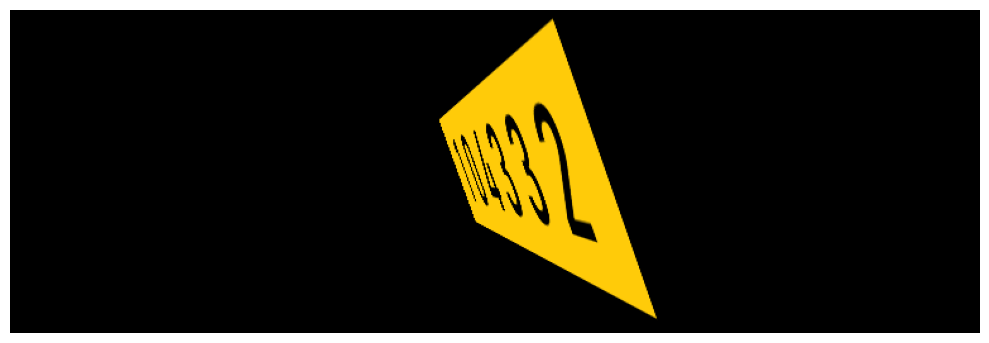

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.lp_processing import warp_image
import random

random.seed(seed)
np.random.seed(seed)

def create_license_plate(plate_width=256, plate_height=64, font_size=100, num_chars=6, fill_density=0.9):
    plate_number = "".join(str(random.randint(0, 9)) for _ in range(num_chars))

    base_plate = Image.new("RGB", (plate_width, plate_height), (255, 203, 9))
    drawer = ImageDraw.Draw(base_plate)
    try:
        font = ImageFont.truetype("bahnschrift.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    usable_width = plate_width * fill_density
    cell_width = int(usable_width / num_chars)
    margin_x = int((plate_width - cell_width * num_chars) / 2)
    margin_y = 10
    center_y = plate_height / 2

    for i, char in enumerate(plate_number):
        left, top, right, bottom = drawer.textbbox((0, 0), char, font=font)
        char_w, char_h = right - left, bottom - top

        cell_left = margin_x + i * cell_width
        center_x = cell_left + cell_width / 2

        x = center_x - char_w / 2 - left
        y = center_y - char_h / 2 - top
        drawer.text((x, y), char, fill=(0, 0, 0), font=font)

    digit_bboxes = [
        (margin_x + i * cell_width, margin_y, cell_width, plate_height - 2 * margin_y) for i in range(num_chars)
    ]

    padded_w = int(plate_width * 1.5)
    padded_h = int(plate_height * 2)
    padded_img = Image.new("RGB", (padded_w, padded_h), (0, 0, 0))

    pad_x = (padded_w - plate_width) // 2
    pad_y = (padded_h - plate_height) // 2
    padded_img.paste(base_plate, (pad_x, pad_y))

    plate_corners = [
        (pad_x, pad_y),
        (pad_x + plate_width - 1, pad_y),
        (pad_x + plate_width - 1, pad_y + plate_height - 1),
        (pad_x, pad_y + plate_height - 1),
    ]

    return padded_img, plate_corners, plate_number, digit_bboxes

alpha, beta = 80, 20
focal_length = plate_width

plate_pil, src_pts, plate_num, _ = create_license_plate(plate_width, plate_height, font_size)
plate_rgb = np.array(plate_pil)
warped_img, dst_pts = warp_image(plate_rgb, src_pts, alpha, beta, focal_length)

plt.figure(figsize=(10, 5))
plt.imshow(warped_img)
plt.axis("off")
plt.tight_layout()
plt.show()

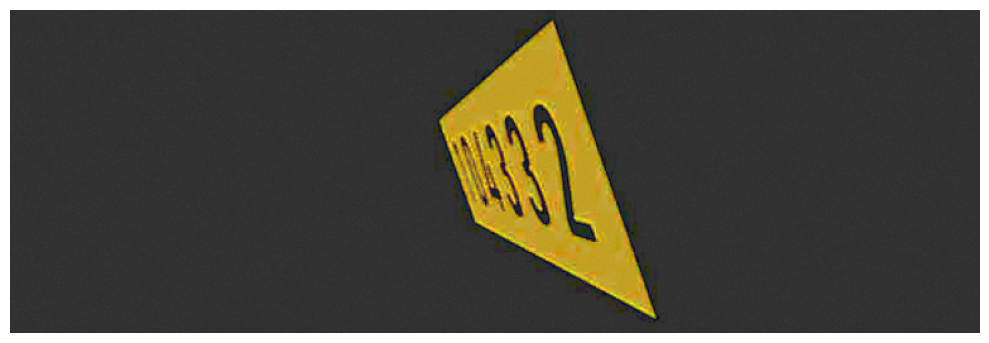

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.lp_processing import warp_image, simulate_noise

np.random.seed(seed)
random.seed(seed)

# Generate and warp plate
padded_img, src_pts, plate_number, bboxes = create_license_plate(
    plate_width=plate_width, plate_height=plate_height, font_size=font_size
)
img_rgb = np.array(padded_img)

warped_rgb, dst_pts = warp_image(image=img_rgb, src_points=src_pts, alpha=alpha, beta=beta, f=focal_length)

#  Apply noise pipeline
noisy_rgb = simulate_noise(warped_rgb)

#  Plot the noisy, warped plate
plt.figure(figsize=(10, 5))
plt.imshow(noisy_rgb)
plt.axis("off")
plt.tight_layout()
plt.show()

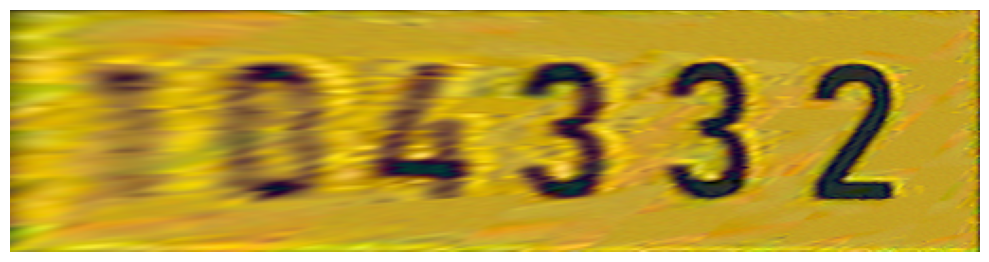

In [137]:
import cv2

def dewarp_image(image, src_points, dst_points):
    # Convert RGB to BGR for OpenCV operations
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Ensure src_points and dst_points are numpy arrays
    src_points = np.array(src_points, dtype=np.float32)

    # Ensure src_points and dst_points are float32
    src_points = np.float32(src_points)
    dst_points = np.float32(dst_points)

    # Get the inverse perspective transformation matrix and apply it
    M_inv = cv2.getPerspectiveTransform(dst_points, src_points)
    dewarped_image = cv2.warpPerspective(image, M_inv, (image.shape[1], image.shape[0]), flags=cv2.INTER_LANCZOS4)

    # Convert BGR back to RGB
    dewarped_image_rgb = cv2.cvtColor(dewarped_image, cv2.COLOR_BGR2RGB)

    return dewarped_image_rgb

def crop_to_original_size(image, original_width, original_height):
    height, width = image.shape[:2]

    # Calculate cropping coordinates to get the central region
    left = (width - original_width) // 2
    top = (height - original_height) // 2
    right = left + original_width
    bottom = top + original_height

    # Crop and return the image
    cropped_image = image[top:bottom, left:right]
    return cropped_image

def downscale_plate(image, bboxes, target_size):
    h, w = image.shape[:2]
    tw, th = target_size
    sx, sy = tw / w, th / h
    blurred_image = cv2.GaussianBlur(image, (3, 3), sigmaX=0.5, sigmaY=0.5)
    down_img = cv2.resize(blurred_image, (tw, th), interpolation=cv2.INTER_AREA)
    down_bboxes = [(int(x * sx), int(y * sy), int(w_ * sx), int(h_ * sy)) for (x, y, w_, h_) in bboxes]
    return down_img, down_bboxes

dewarped_rgb = dewarp_image(noisy_rgb, src_pts, dst_pts)
# Crop back to original plate area
crop_clean = crop_to_original_size(img_rgb, plate_width, plate_height)
crop_dist = crop_to_original_size(dewarped_rgb, plate_width, plate_height)

output_size = (256, 64)
crop_clean_ds, _ = downscale_plate(crop_clean, [], output_size)
crop_dist_ds, _ = downscale_plate(crop_dist, bboxes, output_size)

plt.figure(figsize=(10,5))
plt.imshow(crop_dist)
plt.axis("off")
plt.tight_layout()
plt.show()

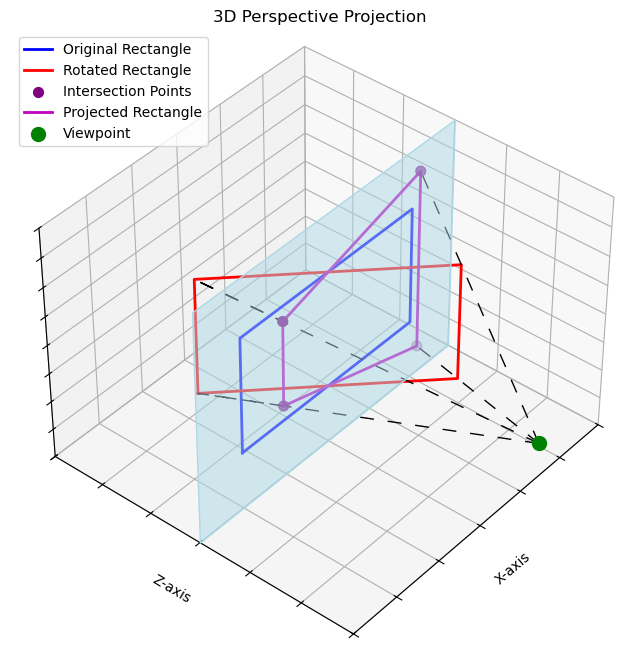

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def rotate_around_y(points, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    rotation_matrix = np.array([
        [cos_a, 0, sin_a],
        [0,     1, 0    ],
        [-sin_a, 0, cos_a]
    ])
    return points @ rotation_matrix.T

def intersect_line_with_plane(p1, p2, plane_z=0):
    t = (plane_z - p1[2]) / (p2[2] - p1[2])
    intersection = p1 + t * (p2 - p1)
    return intersection

# Original rectangle in the xy-plane (z=0)
rectangle = np.array([
    [-1, -1, 0],  # Bottom-left
    [ 1, -1, 0],  # Bottom-right
    [ 1,  1, 0],  # Top-right
    [-1,  1, 0]   # Top-left
])

# Define the plane (larger rectangle in the xy-plane)
plane = np.array([
    [-1.5, -2, 0],  # Bottom-left
    [ 1.5, -2, 0],  # Bottom-right
    [ 1.5,  2, 0],  # Top-right
    [-1.5,  2, 0]   # Top-left
])

# Rotate the rectangle around the Y-axis by 45 degrees
rotated_rectangle = rotate_around_y(rectangle, angle_deg=45)

# Define the viewpoint (camera position)
viewpoint = np.array([0, 0, -2])

# Compute intersections with the z=0 plane
intersections = np.array([
    intersect_line_with_plane(rotated_rectangle[i], viewpoint)
    for i in range(len(rotated_rectangle))
])

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the plane with bluish tint
plane_verts = [list(zip(plane[:, 0], plane[:, 2], plane[:, 1]))]  # Swap Y and Z axes
plane_collection = Poly3DCollection(plane_verts, color='lightblue', alpha=0.5)
ax.add_collection3d(plane_collection)

# Plot the original rectangle
original_rect_closed = np.vstack([rectangle, rectangle[0]])
ax.plot(
    original_rect_closed[:, 0],   # X-axis data
    original_rect_closed[:, 2],   # Y-axis data (use Z data)
    original_rect_closed[:, 1],   # Z-axis data (use Y data)
    'b-', linewidth=2, label='Original Rectangle'
)

# Plot the rotated rectangle
rotated_rect_closed = np.vstack([rotated_rectangle, rotated_rectangle[0]])
ax.plot(
    rotated_rect_closed[:, 0],
    rotated_rect_closed[:, 2],    # Y-axis data (use Z data)
    rotated_rect_closed[:, 1],    # Z-axis data (use Y data)
    'r-', linewidth=2, label='Rotated Rectangle'
)

# Plot dashed lines from the viewpoint through rotated rectangle to intersection points
for i in range(len(rotated_rectangle)):
    xs = [viewpoint[0], rotated_rectangle[i, 0], intersections[i, 0]]
    ys = [viewpoint[2], rotated_rectangle[i, 2], intersections[i, 2]]
    zs = [viewpoint[1], rotated_rectangle[i, 1], intersections[i, 1]]
    ax.plot(xs, ys, zs, 'k--', linewidth=1, dashes=[10, 10])

# Plot the intersection points
ax.scatter(
    intersections[:, 0],
    intersections[:, 2],    # Y-axis data (use Z data)
    intersections[:, 1],    # Z-axis data (use Y data)
    color='purple', s=50, label='Intersection Points'
)

# Connect intersection points to form the projected rectangle
intersections_closed = np.vstack([intersections, intersections[0]])
ax.plot(
    intersections_closed[:, 0],
    intersections_closed[:, 2],    # Y-axis data (use Z data)
    intersections_closed[:, 1],    # Z-axis data (use Y data)
    'm-', linewidth=2, label='Projected Rectangle'
)

# Plot the viewpoint
ax.scatter(
    viewpoint[0],
    viewpoint[2],    # Y-axis data (use Z data)
    viewpoint[1],    # Z-axis data (use Y data)
    color='g', s=100, label='Viewpoint'
)

# Set labels and title
ax.set_title('3D Perspective Projection')
ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')  # Reflects swapped axes in plotting
ax.set_zlabel('Y-axis')  # Reflects swapped axes in plotting
ax.legend()

# Adjust the viewing angle
ax.view_init(elev=40, azim=-140)

# Adjust axis limits if necessary
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-2, 2)

# Hide axis tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

# Display the plot
plt.show()

C:\Users\stopc\AppData\Local\Temp\ipykernel_17128\1320128982.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', 4)


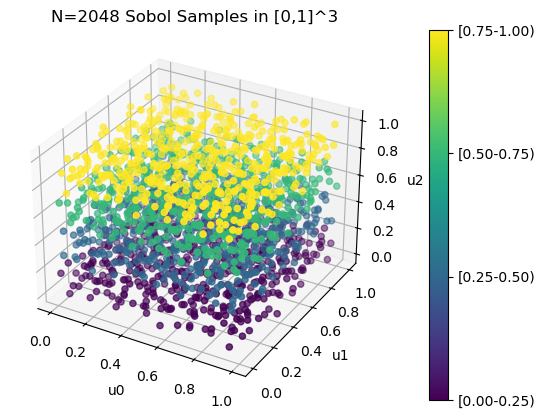

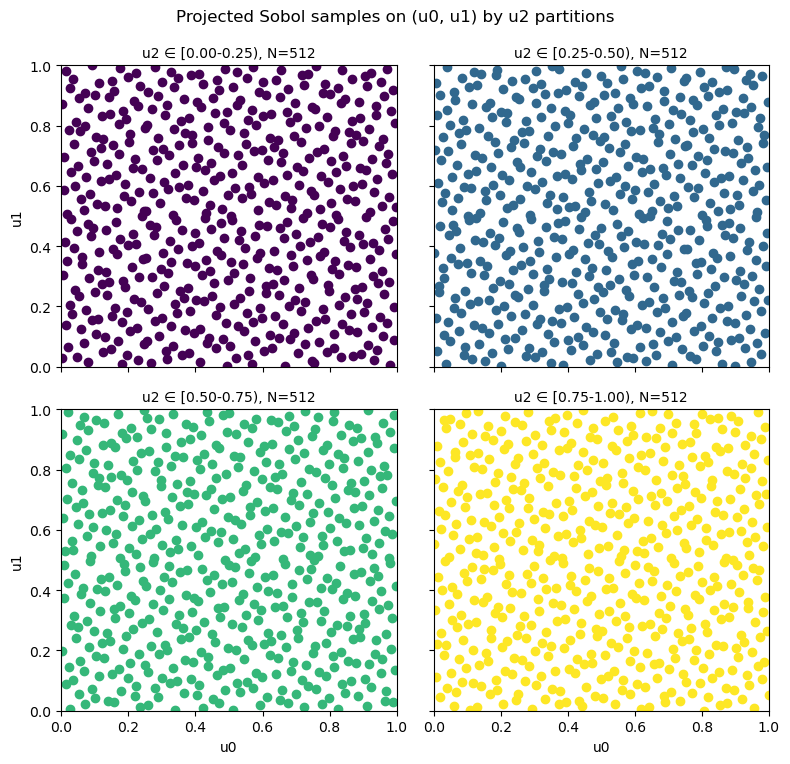

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from mpl_toolkits.mplot3d import Axes3D

# Parameters
m_power = 11  # log2 of number of points
N = 2 ** m_power

# Generate Sobol sequence in 3D
sobol = qmc.Sobol(d=3, scramble=True, seed=42)
u = sobol.random_base2(m=m_power)

# Extract coordinates
u0, u1, u2 = u[:, 0], u[:, 1], u[:, 2]

# Determine region (quadrant assignment) based on u2
region_id = np.minimum((u2 * 4).astype(int), 3)

# Plot Sobol samples colored by their u2 slice
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(u0, u1, u2, c=region_id)
ax.set_xlabel('u0')
ax.set_ylabel('u1')
ax.set_zlabel('u2')
ax.set_title(f'N={N} Sobol Samples in [0,1]^3')

# Add colorbar to indicate region mapping
cbar = plt.colorbar(sc, ax=ax, pad=0.1, ticks=[0, 1, 2, 3])
cbar.set_ticklabels(['[0.00-0.25)', '[0.25-0.50)', '[0.50-0.75)', '[0.75-1.00)'])

# Viridis colors corresponding to each region (same mapping as initial 3D plot)
viridis = plt.cm.get_cmap('viridis', 4)
colors = viridis(range(4))

# Prepare 2x2 subplot with consistent colors
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
intervals = ["[0.00-0.25)", "[0.25-0.50)", "[0.50-0.75)", "[0.75-1.00)"]

for i, ax in enumerate(axes.flatten()):
    idx = region_id == i
    ax.scatter(u0[idx], u1[idx], color=colors[i])
    ax.set_title(f"u2 ∈ {intervals[i]}, N={np.sum(idx)}", fontsize=10)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    if i in (2, 3):
        ax.set_xlabel('u0')
    if i in (0, 2):
        ax.set_ylabel('u1')

fig.suptitle('Projected Sobol samples on (u0, u1) by u2 partitions', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
